### Part A

In [94]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [8]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.naive_bayes import GaussianNB
import missingno as msno

import seaborn as sns
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

In [9]:
d_train = pd.read_csv('/content/CE802_P2_Data.csv')
#d_test = pd.read_csv('/content/CE802_P2_Test.csv')

In [10]:
d_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,-1.33420,24.44400,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,-1.60960,50.59500,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,-0.49086,38.82552,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,-4.56800,39.59310,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,-1.02500,39.95820,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,NaN,True


Preprocessing

In [4]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   int64  
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [5]:
d_train.isnull().mean()*100

F1        0.0
F2        0.0
F3        0.0
F4        0.0
F5        0.0
F6        0.0
F7        0.0
F8        0.0
F9        0.0
F10       0.0
F11       0.0
F12       0.0
F13       0.0
F14       0.0
F15       0.0
F16       0.0
F17       0.0
F18       0.0
F19       0.0
F20       0.0
F21      50.0
Class     0.0
dtype: float64

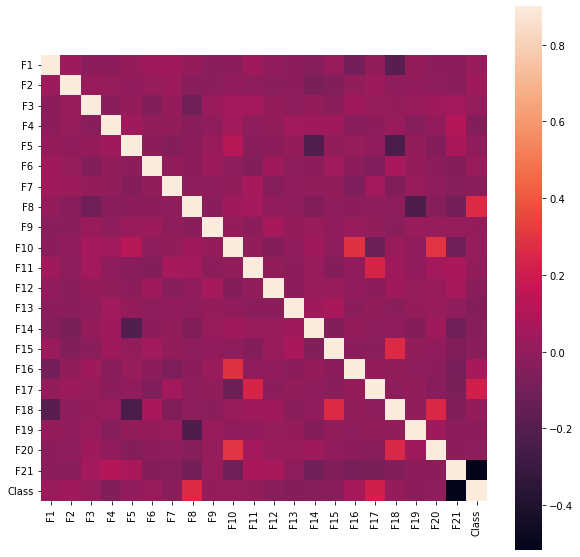

In [11]:
plt.figure(figsize = (10,10))
corr = d_train.corr()
#sns.heatmap(corr, annot = True)
sns.heatmap(corr, vmax=0.9, square=True)

In [12]:
d_train['Class'].value_counts()

True     506
False    494
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


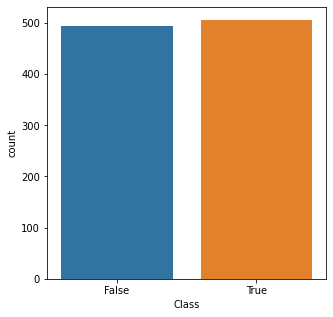

In [13]:
plt.figure(figsize=(5,5)) 
sns.countplot(d_train.Class)

In [14]:
# Boolean variables cast implicitly to integers in python, however still it is better to
# convert the boolean Class to numeric for better performance. 

le = LabelEncoder()
d_train['Class'] = le.fit_transform(d_train['Class'])
d_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,-1.33420,24.44400,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,NaN,0
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,-1.60960,50.59500,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,NaN,1
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,-0.49086,38.82552,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,NaN,0
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,-4.56800,39.59310,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,NaN,0
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,-1.02500,39.95820,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,NaN,1


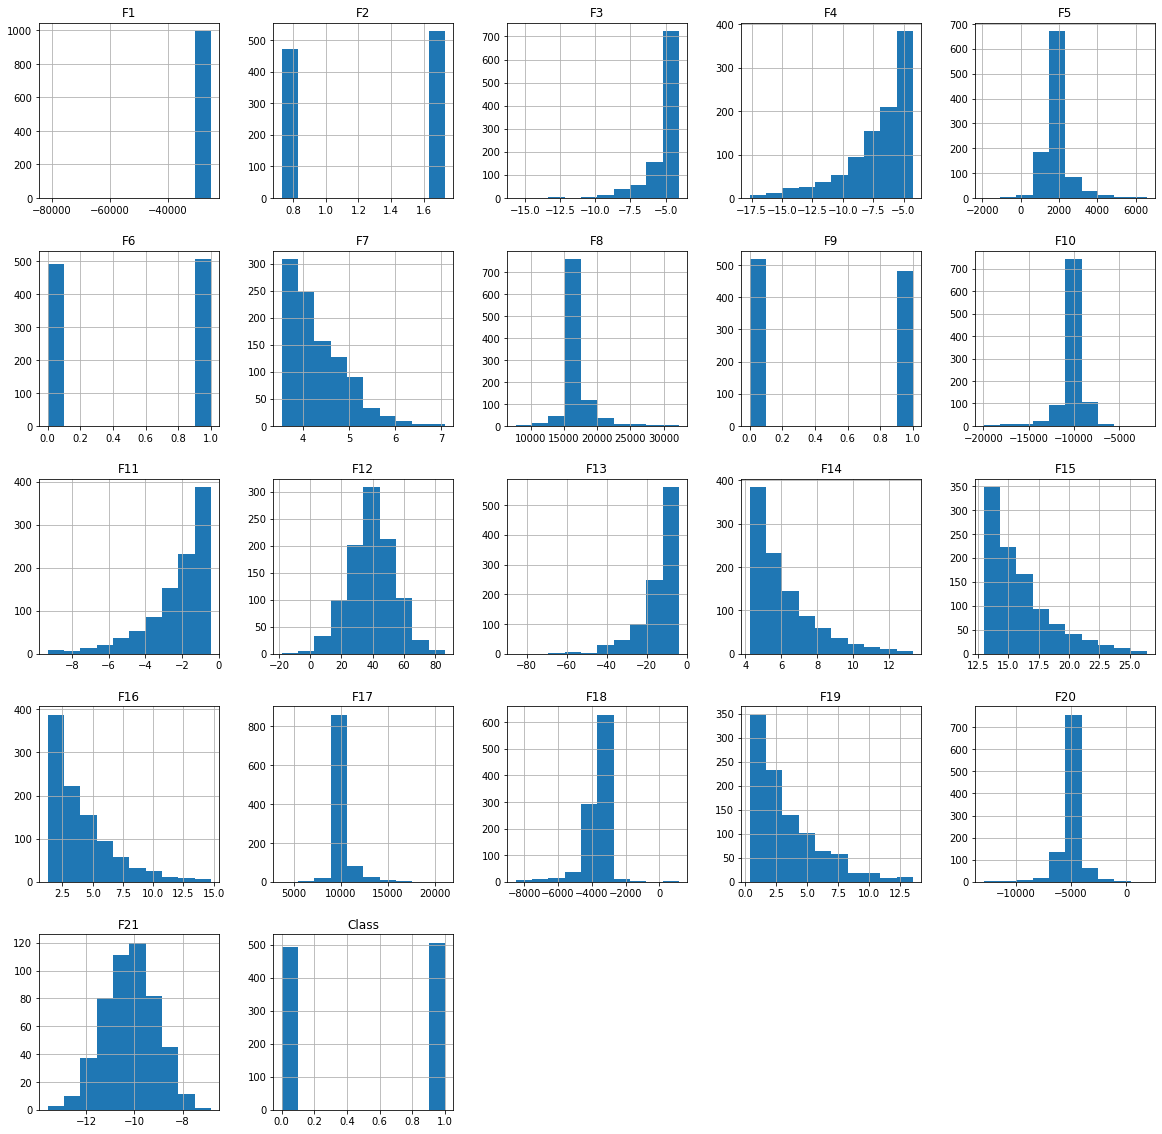

In [18]:
p = d_train.hist(figsize = (20,20))


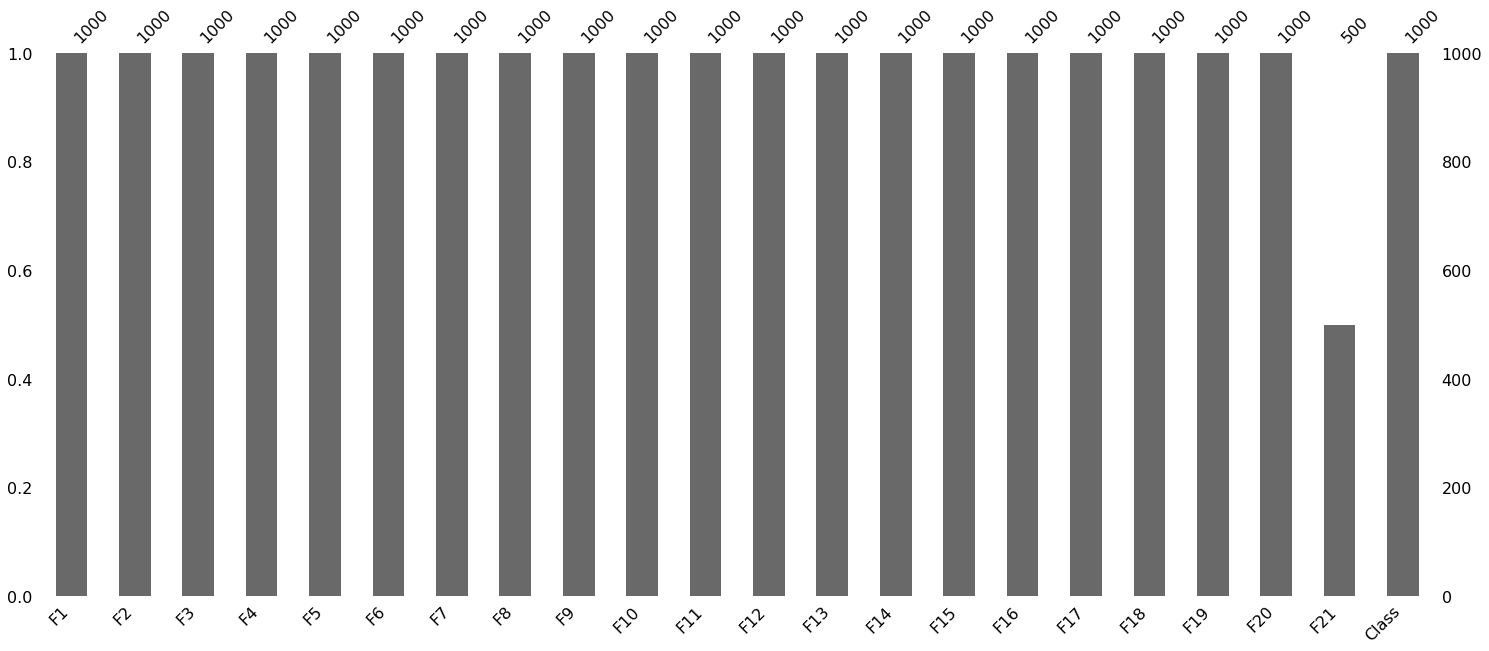

In [20]:
p=msno.bar(d_train)

In [15]:
d_train = d_train.drop(['F21'], axis=1)

In [16]:
x = d_train.drop(['Class'], axis = 1).values
y = d_train['Class'].values

print(x.shape)
print(y.shape) 

(1000, 20)
(1000,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size= 0.3, random_state=42)

Models

In [18]:
DC = DecisionTreeClassifier(random_state=43)
DC.fit(x_train, y_train)
y_p = DC.predict(x_test)
acc = accuracy_score(y_test, y_p)
print('Accuracy', acc)

Accuracy 0.8266666666666667


In [19]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy', ac)

Accuracy 0.87


In [178]:
#SVC 1
svm = SVC(kernel = 'linear', gamma=0.0001, C=100., random_state = 42)
svm.fit(x_train, y_train)
y_pr = svm.predict(x_test)
acd = accuracy_score(y_test, y_pr)
print('Accuracy', acd)

Accuracy 0.66


In [20]:
xgb = XGBClassifier(n_estimators = 10 ,learning_rate = 0.1,max_depth = 9 ,alpha = 5,random_state = 42)
xgb.fit(x_train, y_train)
y_xgb = xgb.predict(x_test)
acd = accuracy_score(y_test, y_xgb)
print('Accuracy', acd)
print(classification_report(y_test, y_xgb))

Accuracy 0.9133333333333333
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       144
           1       0.91      0.92      0.92       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [180]:
#SVC2
clf = SVC(gamma=0.01, C=10.)
Cs = np.logspace(-1, 3, 5)  # five logarithmically spaced values of C
Gs = np.logspace(-7, -0, 5)  # five logarithmically spaced values of gamma
clf = GridSearchCV(estimator=clf, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1)

clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.7828571428571428

In [181]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_prr = knn.predict(x_test)
acd = accuracy_score(y_test, y_prr)
print('Accuracy', acd)

Accuracy 0.6733333333333333


ML Techniques

In [10]:
models = []
results = []
names = []

models.append(('DT', DecisionTreeClassifier(),
               {'criterion': ['entropy', 'gini'], 'max_depth': [None, 10, 15]}))

models.append(('SVC', SVC(gamma=0.01, C=10),
               {'gamma': np.logspace(-7, -0, 5), 'C': np.logspace(-1, 3, 5)}))

models.append(('RFC', RandomForestClassifier(),
               {'n_estimators': np.linspace(100, 300, 5, dtype=int),'max_depth': [None, 10, 15]}))

models.append(('XGB', XGBClassifier(n_estimators = 10 ,learning_rate = 0.1, max_depth = 9 ,alpha = 5,random_state = 42),
              {'max_bin':[256]}))

models.append(('KNN', KNeighborsClassifier(n_neighbors=5),
               {'leaf_size':[30]}))

In [11]:
for name, model, classifier_params in models:
    #creating a pipeline for transformation and data fitting.
    pipe = Pipeline(steps=[('imputer', SimpleImputer()),
                       ('scaler', StandardScaler()),
                       ('classifier', model)])
    
    #preparing parameters for parameter tuning in GridSearchCV
    pipe_params = {'scaler__with_std' : [True, False]}
    for param in classifier_params.items():
        pipe_params[f'classifier__{param[0]}'] = param[1]
    
    grid = GridSearchCV(pipe, param_grid=pipe_params, n_jobs=-1)
    grid.fit(x, y)
    
    #Recording results and evaluating a model with best parameters found
    scores = cross_val_score(grid.best_estimator_, x, y, scoring='accuracy')
    results.append(scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean()*100, scores.std())
    print(msg)
    

DT: 83.000000 (0.024698)
SVC: 74.500000 (0.030496)
RFC: 85.500000 (0.014142)
XGB: 88.400000 (0.008000)
KNN: 65.600000 (0.013928)


[array([0.785, 0.83 , 0.83 , 0.85 , 0.855]), array([0.71 , 0.745, 0.745, 0.725, 0.8  ]), array([0.845, 0.88 , 0.86 , 0.85 , 0.84 ]), array([0.89 , 0.875, 0.895, 0.875, 0.885]), array([0.645, 0.64 , 0.68 , 0.655, 0.66 ])]
['DT', 'SVC', 'RFC', 'XGB', 'KNN']


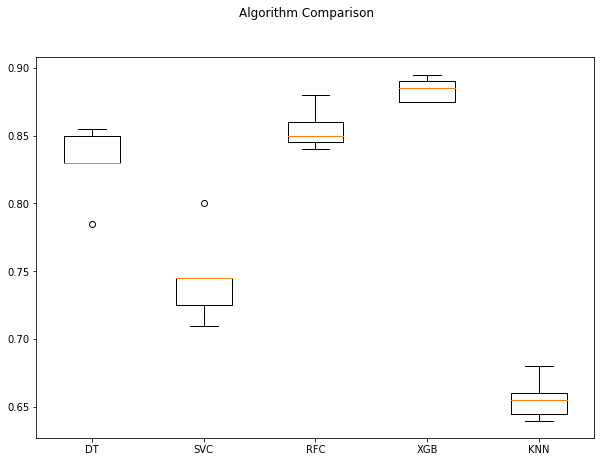

In [19]:
#print(results)
#print(names)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
xgb_model = models[3][1]
#print(xgb_model)
xgb_model.fit(x,y)

XGBClassifier(alpha=5, max_depth=9, n_estimators=10, random_state=42)

### Part B

In [23]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
#test_df = pd.read_csv('CE802_P2_Test.csv')
test_df = pd.read_csv('/content/CE802_P2_Test.csv')
# test_df.head()
# Make sure you work on a copy
test_df = test_df.drop(['F21'], axis=1)
# test_df.head()

test_data = test_df.iloc[:,:-1].copy()
# print(test_data)
#predicted = ... # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...
predicted = xgb_model.predict(test_data.values)
print(np.shape(predicted))
# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('/content/CE802_P2_Test.csv').iloc[:,:1].equals(pd.read_csv('/content/CE802_P2_Test_Predictions.csv').iloc[:,:1])

(1000,)
